
==== Menu ====

1. Ler Ficheiro
2. Mostrar Dados
3. Consumo mensal de água
4. Custo médio mensal de água
5. Parques com maior e menor custos
6. Sair
Selecione uma opção: 1
Introduza o nome do ficheiro: 1

Ficheiro importado com êxito!

==== Menu ====

1. Ler Ficheiro
2. Mostrar Dados
3. Consumo mensal de água
4. Custo médio mensal de água
5. Parques com maior e menor custos
6. Sair
Selecione uma opção: 3
Nome do parque: Covelo
Ano: 2023
Mês (início): 1
Mês (fim): 3


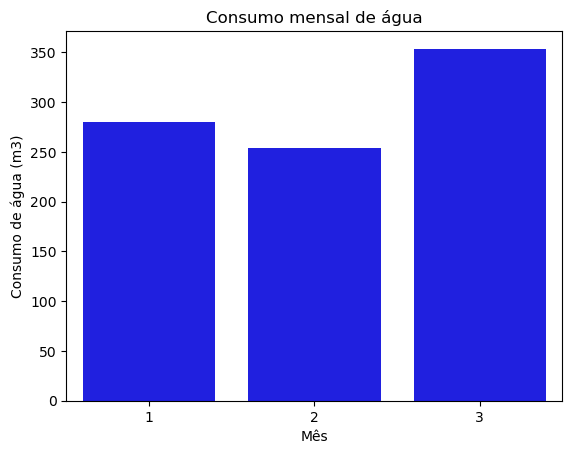


==== Menu ====

1. Ler Ficheiro
2. Mostrar Dados
3. Consumo mensal de água
4. Custo médio mensal de água
5. Parques com maior e menor custos
6. Sair
Selecione uma opção: 4
Quantos parques deseja analisar?2
Nome do parque: Cidade
Nome do parque: Covelo

Média de custos mensais do parque Cidade: 2739.65€/m³

Média de custos mensais do parque Covelo: 333.15€/m³

==== Menu ====

1. Ler Ficheiro
2. Mostrar Dados
3. Consumo mensal de água
4. Custo médio mensal de água
5. Parques com maior e menor custos
6. Sair


In [ ]:
# US09
import pandas as pd
import math
import seaborn as sns
import matplotlib.pyplot as plt
from tabulate import tabulate

dadosFicheiro = pd.DataFrame()
consumo = []

def menu():
    print("\n==== Menu ====\n")
    print("1. Ler Ficheiro")
    print("2. Mostrar Dados")
    print("3. Consumo mensal de água")
    print("4. Custo médio mensal de água")
    print("5. Parques com maior e menor custos")
    print("6. Sair")
    
def consumoCustosMensal(consumo):

    # guarda nome, ano, mês da primeira linha
    nomeAtual = dadosFicheiro.iloc[0, 0]
    anoAtual = dadosFicheiro.iloc[0, 1]
    mesAtual = dadosFicheiro.iloc[0, 2]

    # inicia a variável a zero 
    total = 0
    preco = 0

    # varre todas as linhas do ficheiro
    for n in range(len(dadosFicheiro)):
        if dadosFicheiro.iloc[n, 0] == nomeAtual and dadosFicheiro.iloc[n, 1] == anoAtual and dadosFicheiro.iloc[n, 2] == mesAtual:
            total += float(dadosFicheiro.iloc[n, 4])

        # se houver alguma alteração, seja no nome, no ano, ou no mês, é guardado os valores obtidos até agora e inicia novamente a soma
        else:
            #verifica se excedeu o valor establecido para aplicação da taxa e calcula o preço
            if total > 1000:
                preco = total*0.7 + (total-1000)*(0.7*0.15)
            else:
                preco = total*0.7

            # adiciona nova linha com Nome, Ano, Mês, Consumo(m^3) e Preço e o math.ceil(number * 100) / 100 arredonda o número para cima (pq a conta da água nunca favorece o cliente)
            consumo.append([nomeAtual, anoAtual, mesAtual, math.ceil(total * 100) / 100, math.ceil(preco * 100) / 100])  

            # inicia a variável total
            total = float(dadosFicheiro.iloc[n, 4])

            # atualiza nome, ano e mês para não ter de se verificar qual dos 3 alterou
            nomeAtual = dadosFicheiro.iloc[n, 0]  # Atualizar o nome atual
            anoAtual = dadosFicheiro.iloc[n, 1]  # Atualizar o ano atual
            mesAtual = dadosFicheiro.iloc[n, 2]  # Atualizar o mês atual

    # último a adicionar a lista, já que no "for" só é adicionado se existir uma alteração (no nome, no ano ou no mês)
    consumo.append([nomeAtual, anoAtual, mesAtual, math.ceil(total * 100) / 100, math.ceil(preco * 100) / 100])
    
    return consumo

def lerFicheiro(dadosFicheiro):
    
    while dadosFicheiro.empty == True:
    
        nomeFicheiro = input("Introduza o nome do ficheiro: ") 
        
        # Cria o caminho correto para posteriormente se ler o ficheiro
        CAMINHO_FICHEIRO = 'water_consumption.csv'

        try:
            # Lê o ficheiro para um DataFrame
            dadosFicheiro = pd.read_csv(CAMINHO_FICHEIRO, sep=';')

            # Organiza a matriz por nome, depois por ano, por mês e dia
            dadosFicheiro = dadosFicheiro.sort_values(by=[dadosFicheiro.columns[0], dadosFicheiro.columns[1], dadosFicheiro.columns[2], dadosFicheiro.columns[3]])

            # Substitui vírgulas por pontos na quinta coluna (consumo) para evitar erros ao passar para float
            dadosFicheiro[dadosFicheiro.columns[4]] = dadosFicheiro[dadosFicheiro.columns[4]].str.replace(',', '.')

            # Converte as colunas (ano, mês, dia, consumo) para int e float
            dadosFicheiro[[dadosFicheiro.columns[1], dadosFicheiro.columns[2], dadosFicheiro.columns[3]]] = dadosFicheiro[[dadosFicheiro.columns[1], dadosFicheiro.columns[2], dadosFicheiro.columns[3]]].astype(int)
            dadosFicheiro[dadosFicheiro.columns[4]] = dadosFicheiro[dadosFicheiro.columns[4]].apply(pd.to_numeric, errors='coerce')


        except FileNotFoundError:
            # Se o arquivo não for encontrado, mostra uma mensagem de erro
            print("\033[91;1m" + "\nO FICHEIRO NÃO ENCONTRADO. Verifique o nome e/ou tente novamente.\n"  + "\033[0m")
            
    print("\033[92;1m" + "\nFicheiro importado com êxito!" + "\033[0m")
            
    return dadosFicheiro


def mostrarDados(dadosFicheiro):
    
    print(dadosFicheiro.to_string(index=False))
    
def consumoMensal(consumo, nome, ano, primeiroMes, ultimoMes):

    x = []  # Lista para os meses
    y = []  # Lista para o consumo

    for n in range(len(consumo)):
        
        # Verifica se está de acordo com o que é pedido pelo utilizador: nome, ano, mês
        if consumo[n][0] == nome and consumo[n][1] == ano and primeiroMes <= consumo[n][2] <= ultimoMes:
            y.append(consumo[n][3])
            x.append(consumo[n][2])

    # Gráfico de barras
    sns.barplot(x=x, y=y, color='blue')

    # Título, nome do eixo x, nome do eixo y
    plt.title('Consumo mensal de água')
    plt.xlabel('Mês')
    plt.ylabel('Consumo de água (m3)')

    plt.show()
    
def custoMedio(consumo, nomesAnalisar):
    
    nomesAnalisar.sort()

    nomeAtual = nomesAnalisar[0]
    media = []
    cont = 0
    somaPreco = 0
    
    for n in range(len(consumo)):
        if consumo[n][0] == nomeAtual:
            somaPreco += consumo[n][4] # 0 - nome, 1 - ano, 2 - mes, 3 - consumo, 4 - custo
            cont += 1
        else:
            if cont != 0 and nomeAtual in nomesAnalisar:  # Verifica se houve consumo de um dos escolhidos
                media.append([nomeAtual, somaPreco / cont])
            nomeAtual = consumo[n][0] # Atualiza o nome atual
            somaPreco = consumo[n][4] # Atualiza o preço
            cont = 1  # O contador inicia a 1 por já ter registado o primeiro mês nas duas linhas anteriores
            
    # Verifica se o último parque analisado é um dos pedidos 
    if nomeAtual == nomesAnalisar[-1]:
        media.append([nomeAtual, somaPreco / cont])

    for item in media:
        print(f"\nMédia de custos mensais do parque {item[0]}: {item[1]:.2f} €/m³")
        
def encontrarMenorMaior(dadosFicheiro, menorMaior):

    nomeAtual = dadosFicheiro.iloc[0,0]
    soma = float(0) # Elemento neutro da adição
    maiorSoma = float('-inf')  # Inicia com o menor valor possível
    menorSoma = float('inf')   # Inicia com o maior valor possível
    parqueMaiorConsumo = ''
    parqueMenorConsumo = ''

    for n in range(len(dadosFicheiro)):
        if dadosFicheiro.iloc[n, 0] == nomeAtual:
            soma += float(dadosFicheiro.iloc[n, 4])
        else:
            if menorSoma > soma:
                menorSoma = soma
                parqueMenorConsumo = nomeAtual

            if maiorSoma < soma:
                maiorSoma = soma
                parqueMaiorConsumo = nomeAtual

            soma = float(dadosFicheiro.iloc[n, 4])
            nomeAtual = dadosFicheiro.iloc[n, 0]

    # último parque
    if menorSoma > soma:
        parqueMenorConsumo = nomeAtual
    if maiorSoma < soma:
        parqueMaiorConsumo = nomeAtual

    print(parqueMenorConsumo + " " + parqueMaiorConsumo)
    
    menorMaior.append(parqueMenorConsumo)
    menorMaior.append(parqueMaiorConsumo)
    
    return menorMaior

def dadosTabela(dadosFicheiro, nomeParque, dados):
    dados.append([nomeParque, 
              dadosFicheiro[dadosFicheiro['Park'] == nomeParque]['Consumption'].mean(), 
              dadosFicheiro[dadosFicheiro['Park'] == nomeParque]['Consumption'].median(), 
              dadosFicheiro[dadosFicheiro['Park'] == nomeParque]['Consumption'].std(), 
              dadosFicheiro[dadosFicheiro['Park'] == nomeParque]['Consumption'].skew()])
    
    return dados

def tabela(dados, titulos):
    print(tabulate(dados, headers=titulos, tablefmt='grid'))
    
def tabelasRelativaAbsoluto(dadosFicheiro, nomeParque):
    
    # Filtrar o DataFrame pelo nome do parque específico
    dadosParqueEspecifico = dadosFicheiro[dadosFicheiro['Park'] == nomeParque]

    minValor = dadosParqueEspecifico.iloc[:, 4].min()
    maxValor = dadosParqueEspecifico.iloc[:, 4].max()
    numClasses = 5
    
    somaColuna = dadosParqueEspecifico.iloc[:, 4].count()

    tamanhoIntervalo = round((maxValor - minValor) / numClasses, 2)

    intervalos = []
    for i in range(numClasses):
        intervaloInicio = minValor + i * tamanhoIntervalo
        intervaloFim = minValor + (i + 1) * tamanhoIntervalo
        intervalos.append(f"{intervaloInicio:.2f} - {intervaloFim:.2f}")

    tabelaAR = []
    for i in range(numClasses):
        if i == numClasses - 1:
            tabelaAR.append((f'{minValor + i * tamanhoIntervalo:.2f} - {maxValor:.2f}', dadosParqueEspecifico[(dadosParqueEspecifico.iloc[:, 4] >= minValor + i * tamanhoIntervalo) & (dadosParqueEspecifico.iloc[:, 4] <= maxValor)].shape[0]))
        else:
            tabelaAR.append((f'{minValor + i * tamanhoIntervalo:.2f} - {minValor + (i + 1) * tamanhoIntervalo:.2f}', dadosParqueEspecifico[(dadosParqueEspecifico.iloc[:, 4] >= minValor + i * tamanhoIntervalo) & (dadosParqueEspecifico.iloc[:, 4] < minValor + (i + 1) * tamanhoIntervalo)].shape[0]))

    titulos = ['Intervalo', 'Número de Ocorrências','Ocorrências (%)']

    for i in range(len(tabelaAR)):
        tabelaAR[i] = list(tabelaAR[i])  # Converte a lista para poder modificar
        tabelaAR[i].append(round((tabelaAR[i][1] / somaColuna) * 100, 2)) 
    
    tabela(tabelaAR, titulos)

def verificarOutliers(dadosFicheiro, nomeParque):
    parqueEspecifico = dadosFicheiro[dadosFicheiro['Park'] == nomeParque]
    consumo = parqueEspecifico['Consumption']

    # Calculando os quartis
    Q1 = consumo.quantile(0.25)
    Q3 = consumo.quantile(0.75)
    IQR = Q3 - Q1

    # Definindo os limites para os outliers
    limiteInferior = Q1 - 1.5 * IQR
    limiteSuperior = Q3 + 1.5 * IQR

    # Identificando os outliers
    outliers = consumo[(consumo < limiteInferior) | (consumo > limiteSuperior)]

    if not outliers.empty:
        print(f"\nOutliers encontrados para o parque {nomeParque} (linha do ficheiro, outlier):")
        print(outliers)
        print(f"Total: {len(outliers)}")
    else:
        print(f"\nNão foram encontrados outliers para o parque {nomeParque}.")

def histograma(dadosFicheiros, nomeParque):

    dadosParqueEspecifico = dadosFicheiros[dadosFicheiros.iloc[:, 0] == nomeParque]

    fig, axs = plt.subplots(1, 2, figsize=(12, 6))

    # Primeiro subplot
    sns.histplot(dadosParqueEspecifico.iloc[:, 4], bins=10, ax=axs[0])
    axs[0].set_xlabel('Consumo de água diário (m3)')
    axs[0].set_ylabel('Número de Ocorrências')
    axs[0].set_title('Consumo de água do parque: ' + nomeParque + ' (10 classes)')

    # Segundo subplot
    sns.histplot(dadosParqueEspecifico.iloc[:, 4], bins=100, ax=axs[1])
    axs[1].set_xlabel('Consumo de água diário (m3)')
    axs[1].set_ylabel('Número de Ocorrências')
    axs[1].set_title('Consumo de água do parque: ' + nomeParque + ' (100 classes)')

    plt.tight_layout()

    plt.show()

while True:
    
    menu()
    escolha = input("Selecione uma opção: ")

    if escolha == "1":
        dadosFicheiro = lerFicheiro(dadosFicheiro)
        consumo = consumoCustosMensal(consumo)
        
    elif escolha == "2":
        if dadosFicheiro.empty:
            print("\033[91;1m" + "NÃO FOI LIDO NENHUM FICHEIRO!" + "\033[0m")
        else:
            mostrarDados(dadosFicheiro)
            
    elif escolha == "3":
        if dadosFicheiro.empty:
            print("\033[91;1m" + "NÃO FOI LIDO NENHUM FICHEIRO!" + "\033[0m")
        else:
            while True:
                nome = input("Nome do parque: ")
                if nome in dadosFicheiro.iloc[:, 0].values:
                    break
                else:
                    print("\033[91;1m" + "O NOME DO PARQUE ESTÁ INVÁLIDO, POR FAVOR INSIRA OUTRO." + "\033[0m")

            while True:
                try:
                    ano = int(input("Ano: "))
                    if ano in dadosFicheiro.iloc[:, 1].values:
                        break
                    else:
                        print("\033[91;1m" + "O ANO SELECIONADO ESTÁ INVÁLIDO, POR FAVOR INSIRA OUTRO." + "\033[0m")
                except ValueError:
                    print("\033[91;1m" + "INSIRA UM VALOR INTEIRO." + "\033[0m")

            while True:
                try:
                    primeiroMes = int(input("Mês (início): "))
                    if primeiroMes in dadosFicheiro[(dadosFicheiro.iloc[:, 1] == ano)]['Month'].values:
                        break
                    else:
                        print("\033[91;1m" + "O MÊS INICIAL ESTÁ INVÁLIDO, POR FAVOR INSIRA OUTRO." + "\033[0m")
                except ValueError:
                    print("\033[91;1m" + "INSIRA UM VALOR INTEIRO." + "\033[0m")
                    
            while True:
                try:
                    ultimoMes = int(input("Mês (fim): "))
                    if ultimoMes in dadosFicheiro[(dadosFicheiro.iloc[:, 1] == ano)]['Month'].values and ultimoMes >= primeiroMes:
                        break
                    else:
                        print("\033[91;1m" + "O MÊS FINAL ESTÁ INVÁLIDO, POR FAVOR INSIRA OUTRO." + "\033[0m")
                except ValueError:
                    print("\033[91;1m" + "INSIRA UM VALOR INTEIRO." + "\033[0m")

            consumoMensal(consumo, nome, ano, primeiroMes, ultimoMes)
            
    elif escolha == "4":
        
        if dadosFicheiro.empty:
            print("\033[91;1m" + "NÃO FOI LIDO NENHUM FICHEIRO!" + "\033[0m")
        else:
            while True:
                try:
                    num = int(input("Quantos parques deseja analisar?"))
                    if num < dadosFicheiro.iloc[:, 0].nunique() and num != 0:
                        break
                    else:
                        print("\033[91;1m" + "O NÚMERO DE PARQUES ESTÁ INVÁLIDO, POR FAVOR INSIRA OUTRO." + "\033[0m")
                except ValueError:
                        print("\033[91;1m" + "INSIRA UM VALOR INTEIRO." + "\033[0m")

            nomesAnalisar = []

            while len(nomesAnalisar) != num:
                nome = input("Nome do parque: ")
                if nome in dadosFicheiro.iloc[:, 0].values:
                    nomesAnalisar.append(nome)
                else:
                    print("\033[91;1m" + "O NOME DO PARQUE ESTÁ INVÁLIDO, POR FAVOR INSIRA OUTRO." + "\033[0m")

            custoMedio(consumo, nomesAnalisar)
        
    elif escolha == "5":
        
        if dadosFicheiro.empty:
            print("\033[91;1m" + "NÃO FOI LIDO NENHUM FICHEIRO!" + "\033[0m")
        else:
            menorMaior = []
            dadosMenor = []
            dadosMaior = []

            menorMaior = encontrarMenorMaior(dadosFicheiro, menorMaior)

            dadosMenor = dadosTabela(dadosFicheiro, menorMaior[0], dadosMenor)
            dadosMaior = dadosTabela(dadosFicheiro, menorMaior[1], dadosMaior)

            titulos = ['Nome','Média','Mediana','Desvio Padrão','Coeficiente de Assimetria']

            print("\nDados do parque com menor consumo: " + menorMaior[0])
            tabela(dadosMenor, titulos)
            tabelasRelativaAbsoluto(dadosFicheiro, menorMaior[0])
            verificarOutliers(dadosFicheiro, menorMaior[0])
            histograma(dadosFicheiro, menorMaior[0])
        

            print("\nDados do parque com maior consumo: " + menorMaior[1])
            tabela(dadosMaior, titulos)
            tabelasRelativaAbsoluto(dadosFicheiro, menorMaior[1])
            verificarOutliers(dadosFicheiro, menorMaior[1])
            histograma(dadosFicheiro, menorMaior[1]) 
            
        
    elif escolha == "6":
        print("\nObrigada, e até a próxima!")
        break
    else:
        print("\033[91;1m" + "OPÇÃO INVÁLIDA" + "\033[0m")